<a href="https://colab.research.google.com/github/bgohrani/MP_Neuron_Perceptron/blob/main/MP_Neuron_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing data for first model
A breast cancer data collection is imported. We use the sklearn.datasets package for the data





In [45]:
import sklearn.datasets
import numpy as np
import seaborn as sns 
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#Importing Essential Libraries

In [46]:
breast_cancer = sklearn.datasets.load_breast_cancer()
#Loading data from package

In [47]:
X = breast_cancer.data
Y = breast_cancer.target
#Splitting into X and Y for input & output 

In [48]:
print(X.shape, Y.shape)
print(type(X))

(569, 30) (569,)
<class 'numpy.ndarray'>


In [49]:
data = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)
data['class'] = breast_cancer.target

#Using pandas to represent the data easily in a table
#Appending to make a result column 

In [50]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [51]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [52]:
print(data['class'].value_counts()) 
#will print out count of 1 and 0 in output

1    357
0    212
Name: class, dtype: int64


In [53]:
breast_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [54]:
data.groupby('class').std()
#Can group to see variations separately for different labels
#IMPORTANT: MALIGNANT VALUES ARE LOWER BINARISATION MUST BE FLIPPED FOR BETTER ACCURACY

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3.203971,3.779470,21.854653,367.937978,0.012608,0.053987,0.075019,0.034374,0.027638,0.007573,0.345039,0.483178,2.568546,61.355268,0.002890,0.018387,0.021603,0.005517,0.010065,0.002041,4.283569,5.434804,29.457055,597.967743,0.021870,0.170372,0.181507,0.046308,0.074685,0.021553
1,1.780512,3.995125,11.807438,134.287118,0.013446,0.033750,0.043442,0.015909,0.024807,0.006747,0.112570,0.589180,0.771169,8.843472,0.003061,0.016352,0.032918,0.005709,0.006999,0.002938,1.981368,5.493955,13.527091,163.601424,0.020013,0.092180,0.140368,0.035797,0.041745,0.013804


#Splitting the data for training and testing 
Here we will split the data using the skelarn.model_selection package for further computation

In [55]:
X = data.drop('class', axis =1)
# Splitting data again into input/output

In [56]:
Y = data['class']

In [57]:
type(X)
type(Y)

pandas.core.series.Series

In [58]:
print(X.shape, Y.shape)

(569, 30) (569,)


In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.05, stratify = Y, random_state = 1)
#Stratify will ensure statistical values remain approximately equal on training and testing data
#Random_state ensures same splitting is done everytime during execution
# Test_size will split in a proper given ratio

In [60]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(540, 30) (29, 30) (540,) (29,)


#Binarising the Model
Since MP neuron only takes Binary values

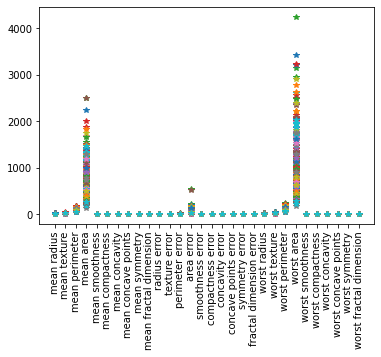

In [ ]:
plt.plot(X_train.T,'*')
#Transpose is taken to get the attributes on the x-axis, Transpose is shown below
plt.xticks(rotation='vertical')
#Done to fix the names vertically on the x-axis
plt.show()

In [ ]:
X_train.T

,566,162,461,89,105,326,422,44,405,218,425,545,427,393,179,27,500,486,173,261,71,210,475,526,365,95,555,64,341,528,394,429,310,106,377,567,435,25,407,9,...,388,278,324,504,498,255,358,529,534,84,100,29,443,276,557,12,343,237,183,539,355,26,177,197,207,391,308,11,86,124,77,445,472,454,397,65,20,509,79,553
mean radius,16.600000,19.590000,27.420000,14.640000,13.110000,14.110000,11.610000,13.170000,10.940000,19.800000,10.030000,13.620000,10.800000,21.610000,12.810000,18.610000,15.040000,14.640000,11.080000,17.350000,8.88800,20.580000,12.830000,13.460000,20.440000,20.260000,10.290000,12.680000,9.606000,13.940000,12.100000,12.720000,11.700000,11.64000,13.460000,20.600000,13.980000,17.140000,12.850000,12.460000,...,11.27000,13.590000,12.200000,9.268000,18.490000,13.960000,8.878000,12.070000,10.960000,12.000000,13.610000,17.570000,10.570000,11.330000,9.423000,19.170000,19.680000,20.480000,11.410000,7.691000,12.560000,14.580000,16.460000,18.080000,17.010000,8.734000,13.500000,15.780000,14.480000,13.370000,18.050000,11.990000,14.920000,12.620000,12.800000,14.780000,13.080000,15.460000,12.860000,9.333000
mean texture,28.080000,18.150000,26.270000,15.240000,15.560000,12.880000,16.020000,21.810000,18.590000,21.560000,21.280000,23.230000,21.980000,22.280000,13.060000,20.250000,16.740000,16.850000,14.710000,23.060000,14.64000,22.140000,15.730000,18.750000,21.780000,23.030000,27.610000,23.840000,16.840000,13.170000,17.720000,17.670000,19.110000,18.33000,28.210000,29.330000,19.620000,16.400000,21.370000,24.040000,...,15.50000,17.840000,15.210000,12.870000,17.520000,17.050000,15.490000,13.440000,17.620000,15.650000,24.980000,15.050000,18.320000,14.160000,27.880000,24.800000,21.680000,21.460000,14.920000,25.440000,19.070000,21.530000,20.110000,21.840000,20.260000,16.840000,12.710000,17.890000,21.460000,16.390000,16.150000,24.890000,14.930000,17.150000,17.460000,23.940000,15.710000,23.950000,18.000000,21.940000
mean perimeter,108.300000,130.700000,186.900000,95.770000,87.210000,90.030000,75.460000,85.420000,70.390000,129.700000,63.190000,87.190000,68.790000,144.400000,81.290000,122.100000,98.730000,94.210000,70.210000,111.000000,58.79000,134.700000,82.890000,87.440000,133.800000,132.400000,65.670000,82.690000,61.640000,90.310000,78.070000,80.980000,74.330000,75.17000,85.890000,140.100000,91.120000,116.000000,82.630000,83.970000,...,73.38000,86.240000,78.010000,61.490000,121.300000,91.430000,56.740000,77.830000,70.790000,76.950000,88.050000,115.000000,66.820000,71.790000,59.260000,132.400000,129.900000,132.500000,73.530000,48.340000,81.920000,97.410000,109.300000,117.400000,109.700000,55.270000,85.690000,103.600000,94.250000,86.100000,120.200000,77.610000,96.450000,80.620000,83.050000,97.400000,85.630000,103.800000,83.190000,59.010000
mean area,858.100000,1214.000000,2501.000000,651.900000,530.200000,616.500000,408.200000,531.500000,370.000000,1230.000000,307.300000,573.200000,359.900000,1407.000000,508.800000,1094.000000,689.400000,666.000000,372.700000,933.100000,244.00000,1290.000000,506.900000,551.100000,1293.000000,1264.000000,321.400000,499.000000,280.500000,594.200000,446.200000,501.300000,418.700000,412.50000,562.100000,1265.000000,599.500000,912.700000,514.500000,475.900000,...,392.00000,572.300000,457.900000,248.700000,1068.000000,602.400000,241.000000,445.200000,365.600000,443.300000,582.700000,955.100000,340.900000,396.600000,271.300000,1123.000000,1194.000000,1306.000000,402.000000,170.400000,485.800000,644.800000,832.900000,1024.000000,904.300000,234.300000,566.200000,781.000000,648.200000,553.500000,1006.000000,441.300000,686.900000,492.900000,508.300000,668.300000,520.000000,731.300000,506.300000,264.000000
mean smoothness,0.084550,0.112000,0.108400,0.113200,0.139800,0.093090,0.108800,0.097140,0.100400,0.093830,0.081170,0.092460,0.088010,0.116700,0.087390,0.094400,0.098830,0.086410,0.100600,0.086620,0.09783,0.090900,0.090400,0.107500,0.091500,0.090780,0.090300,0.112200,0.084810,0.124800,0.102900,0.078960,0.088140,0.11420,0.075170,0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


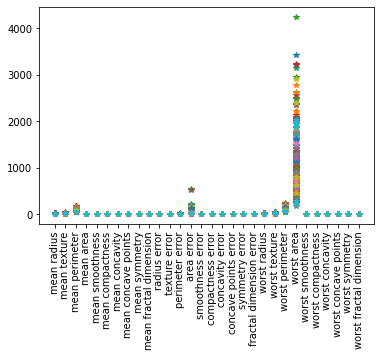

In [61]:
X_train_C3_binarised = X_train['mean area'].map(lambda x: 0 if x < 1000 else 1)
#Takes the column mean area and divides it into 1s ans 0s about the value 1000 
#We can now add this to the original data
X_train_new = X_train
X_train_new['mean area'] = X_train_C3_binarised
#This can now be plotted  
plt.plot(X_train_new.T,'*')
#Transpose is taken to get the attributes on the x-axis, Transpose is shown below
plt.xticks(rotation='vertical')
#Done to fix the names vertically on the x-axis
plt.show()

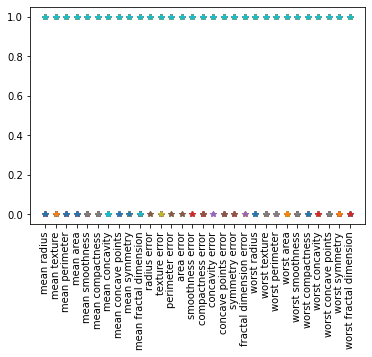

In [62]:
#We can use packages to do this for the entire data
X_binarised_train = X_train.apply(pd.cut, bins =2, labels = [1,0])
plt.plot(X_binarised_train.T,'*')
#Transpose is taken to get the attributes on the x-axis, Transpose is shown below
plt.xticks(rotation='vertical')
#Done to fix the names vertically on the x-axis
plt.show()

In [63]:
#Similarly we can use this for the test data also 
X_binarised_test = X_test.apply(pd.cut, bins = 2, labels = [1,0])
#we have to convert this to arrays for use in algorithms


In [64]:
X_binarised_train = X_binarised_train.to_numpy()
X_binarised_test = X_binarised_test.to_numpy()
Y_train = Y_train.to_numpy()
Y_test = Y_test.to_numpy()

#Run this only while reopening the notebook
#Converting to arrays to deal with this better 

#MP Neuron Model 
Here we will develop the model on which learning and determination of the parameter 'b' will take place

In [67]:
print(X_binarised_train.shape)
print(type(X_binarised_train))
print(type(Y_train))
#To check the given training data and make sure its in the array format

(540, 30)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [68]:
Loss_for_each_b = []
for b in range(0, (X_binarised_train.shape[1])):
  loss = 0
  for i in range(0,(X_binarised_train.shape[0]-1)):
    if np.sum(X_binarised_train[i,:]) >= b: 
      mp_neuron_prediction = 1
    else:
      mp_neuron_prediction = 0
    if Y_train[i] == mp_neuron_prediction:
      loss = loss + 0
    else:
      loss = loss + 1
  Loss_for_each_b.append(loss)

print ("the loss function is minimized and is equal to", min(Loss_for_each_b) , "for b equal to", Loss_for_each_b.index(min(Loss_for_each_b)))

#We're taking all values of b from 0 to 540 and with each value of b iterating over all 540 rows of the given training data and computing the loss values
#We then find the minimum loss function and print out that value of b
#There's some error in this, try with accuracy
  

the loss function is minimized and is equal to 75 for b equal to 27


In [69]:
#Trying with accuracy, first taking fixed value and then taking a loop
#Make a list with predicted y values of the MP neuron model 
#count the number of correct answers and then take percentage

b = 3 

neuron_predictions = [] #Empty list
accuracy_count = 0

for x , y in zip(X_binarised_train, Y_train):
  pred = 1 if np.sum(x) >= b else 0 #will return 1 if true else 0
  neuron_predictions.append(pred)
  accuracy_count += (pred == y)

print("total number of correct predictions with b equal to ", b ,"are" , accuracy_count, "and the accuracy is " ,accuracy_count/ X_binarised_train.shape[0])
print(neuron_predictions)

total number of correct predictions with b equal to  3 are 339 and the accuracy is  0.6277777777777778
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [71]:
# with a proper loop for b 
accuracy_each_b = []
for b in range (0, X_binarised_train.shape[1],1):
  neuron_predictions = [] #Empty list
  accuracy_count = 0
  for x , y in zip(X_binarised_train, Y_train):
    pred = 1 if np.sum(x) >= b else 0 #will return 1 if true else 0
    neuron_predictions.append(pred)
    accuracy_count += (pred == y)
  #print("Accuracy is ", accuracy_count/X_binarised_train.shape[0],"%") #enable to see accuracy for each b
  accuracy_each_b.append(accuracy_count/X_binarised_train.shape[0])
accuracy_each_b
print(max(accuracy_each_b))
print(accuracy_each_b.index(max(accuracy_each_b)))

#printed out the highest accuracy and the corresponding value of b

0.8611111111111112
27


In [72]:
#we will now use this value of b and find out the accuracy of the MP neuron on the test data 
#importing an accuracy calculator from sklearn here 

from sklearn.metrics import accuracy_score

b = 27
neuron_predictions = [] #Empty list 
for x in X_binarised_test:
  pred = 1 if np.sum(x) >= b else 0 #will return 1 if true else 0
  neuron_predictions.append(pred)
  
accuracy_test = accuracy_score(neuron_predictions, Y_test)
print(b ,accuracy_test)


27 0.8275862068965517


#MP Neuron class
Here we'll make a class for MP neuron to train and test the model efficiently with minimal code

In [74]:
class MPNeuron:
  def __init__(self):
    self.b = None
  
  def model(self, x):
    pred = 1 if np.sum(x) >= self.b else 0
    return pred
  
  def predict(self, X_train_data):
    model_prediction = []
    for x in X_train_data:
      predict = self.model(x)
      model_prediction.append(predict)
    return(model_prediction)

  def train(self, X_train_data, Y_train_data):
    acc_b = []

    for b in range(0,X_train_data.shape[1],1):
      self.b = b
      y = self.predict(X_train_data)
      z= accuracy_score(y , Y_train_data)
      acc_b.append(z)
      self.b = acc_b.index(max(acc_b))
    print('highest value of accuracy is', max(acc_b) , 'for b equal to ', acc_b.index(max(acc_b)))

#This class helps us avoid excess code by building an object known as MPNeuron with 3 different functions
#Model will check the prediction condition given in the MP Neuron model
#predict will check this model condition for all values in a given training data for a particular value of b
#train will use the model and predict functions to find out the value of b for which the accuracy is highest on the given training data
#We update self.b at the end to make sure we can use the predict function to evaluate our testing data with the value of b obtained from the training data 



In [75]:
mp_nuron = MPNeuron()
mp_nuron.train(X_binarised_train,Y_train)

highest value of accuracy is 0.8611111111111112 for b equal to  27


In [76]:
answer  = mp_nuron.predict(X_binarised_test)
accuracy = accuracy_score(answer, Y_test)
print(accuracy)

0.8275862068965517


#Perceptron Class
This is the second model we will use. Here the inputs may not be in the binary form however we can standardise them. The inputs to the model may have weights depending on their physical significance to the output. The output in case of a perceptron model must be binary. Instead of using a brute force search as in the case of MP neuron model, the perceptron model uses a proper learning algorithm with step increments in a loop to determine parameters such as the threshold and the weights 

$y = 1, \mbox{if} \sum_i w_i x_i >=b$ 

$y = 0, \mbox{otherwise}$


In [77]:
#we will begin by making a class for the perceptron model similar to the MP neuron model

class Perceptron():
  def __init__(self):
    self.w = None
    self.b = None

  def model(self,x):
    pred = 1 if np.dot(self.w,x) >= self.b else 0
    return pred

  def predict(self, X_train_data):
    model_prediction = []
    for x in X_train_data:
      predict = self.model(x)
      model_prediction.append(predict)
    return model_prediction
    

  def train(self, X_train_data, Y_train_data, epochs=1, lr =1):
    self.w = np.ones(X.shape[1])
    self.b = 0
    accuracy_each = []
    max_accuracy = 0
    wt_matrix = []
     
    for i in range(0,epochs):
      for x,y in zip(X_train_data, Y_train_data):
        test = self.model(x)
        if test < y:
          self.w = self.w + (lr*x)
          self.b = self.b + (lr*1)
        elif test > y: 
          self.w = self.w - (lr*x)
          self.b = self.b - (lr*1)
      accuracy_each.append(accuracy_score(self.predict(X_train_data),Y_train_data))
      wt_matrix.append(self.w)
      if accuracy_each[i] >= max_accuracy:
        max_accuracy= accuracy_each[i]
        best_w = self.w
        best_b = self.b
    self.w = best_w
    self.b = best_b
    print(max_accuracy)



    plt.figure(dpi = 150)
    plt.plot(accuracy_each)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training Accuracies')
    plt.ylim([0.8,1])
    plt.show()
    
    print('max accuracy occurs at epoch value equal to', accuracy_each.index(max(accuracy_each)), 'and is equal to ', max(accuracy_each))
    return(wt_matrix)

        
#Same approach here too. Model and predict functions are pretty much the same and dot product of w and x is being taken here as per the perceptron model theory
#The looping approach changes and here w and b are taken separately, initialised and then iterated over the entire data
#The predict function is taken only for future calculations and self.predict is not called out in the train function. The final values of self.w and self.b are given out
#There's a big error in this approach by the instructor. The different attributes of the data have not been standardised to lie b/w 0 & 1
#Consequently all values are inconsistent with the model
#elif is used to make sure correct predictions do not iterate the values of w & b
#We have added this checkpoint feature to make sure we use the values of w and b for which accuracy is highest
#Learning rate is added to prevent large oscillations and have a smooth plot, increasing epochs increases accuracy
#We return a wt_matrix list for the animation 

In [120]:
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()

0.9296296296296296


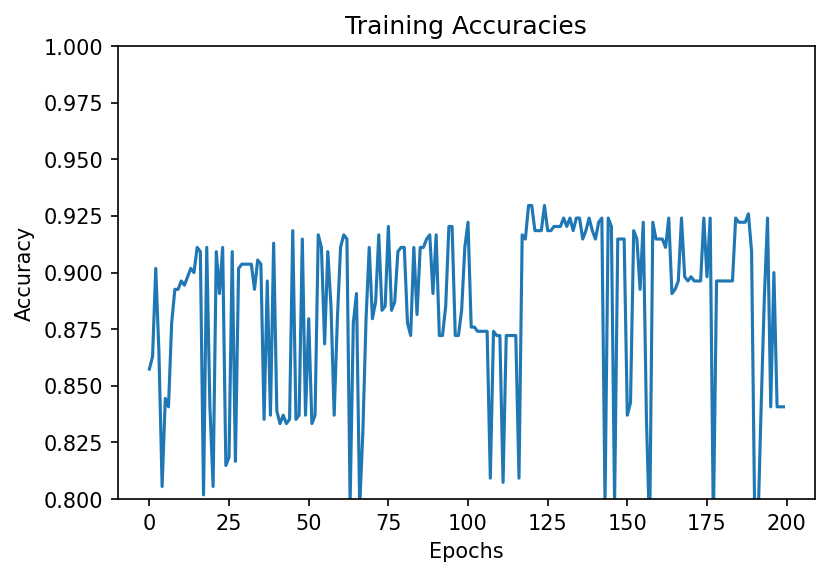

max accuracy occurs at epoch value equal to 119 and is equal to  0.9296296296296296
Accuracy on test data is 0.896551724137931


In [121]:
percep_model = Perceptron()
percep_model.train(X_train_np,Y_train,epochs = 200,lr =0.5)
#We will train the model here as done in the class

y_prediction = percep_model.predict(X_test_np)
print('Accuracy on test data is',accuracy_score(y_prediction,Y_test))
#using the prediction function we have calculated accuracy as before



0.9203703703703704


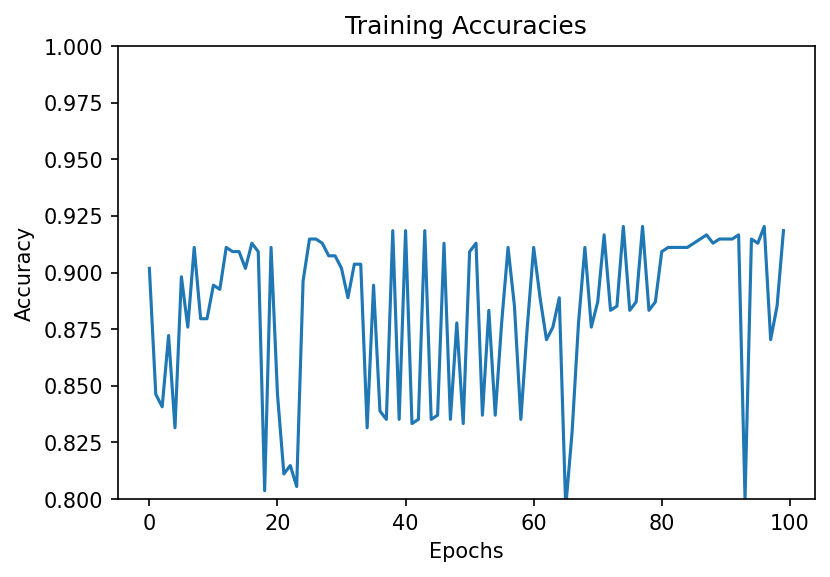

max accuracy occurs at epoch value equal to 74 and is equal to  0.9203703703703704


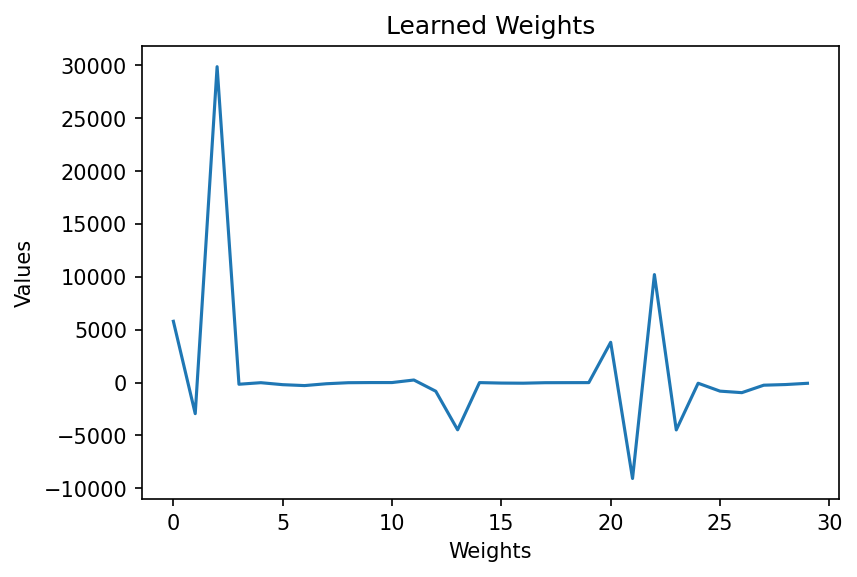

In [122]:
wt_matrix_1= percep_model.train(X_train_np,Y_train,100,1)
plt.figure(dpi=150)
plt.plot(wt_matrix_1[-1])
plt.xlabel('Weights')
plt.ylabel('Values')
plt.title('Learned Weights')
plt.show()

In [111]:
wt_matrix_2 = np.array(wt_matrix_1)

In [112]:
#Animation code here onwards
#We want to visualize how weights change during training
#Weight matrix is used here to get the values of weights at each epoch
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

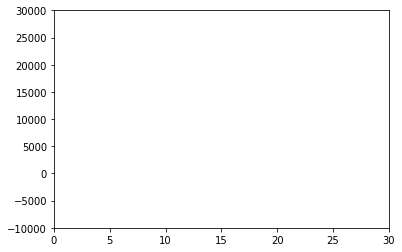

In [135]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim((0,30))
ax.set_ylim((-10000,30000))
#range of animation plot can be decided by plotting any row of wt_matrix
line, = ax.plot([], [], lw=2)

In [136]:
# initialization function: plot the background of each frame
def init():
    line.set_data([], [],)
    return (line,)

In [137]:
# animation function. This is called sequentially
#plot values of x and y are decided here 
#each frame y is that particular row in wt_matrix
def animate(i):
    x = list(range(0,wt_matrix_2.shape[1]))
    y = wt_matrix_2[i]
    line.set_data(x, y)
    return (line,)

In [138]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=200, blit=True)
#frames must be equal to number of rows in the weight matrix, interval/10 is no. of seconds in the video needed

In [139]:
HTML(anim.to_html5_video())
#final animation video
